### **K-means**

Implement [k-means algorithm](https://en.wikipedia.org/wiki/K-means_clustering)

 - load the s3.txt file
 - choose 15 random points wihin your data
 - compute the distance from those points to each point of the data
 - assign the points to the closest centroids
 - update the centroids as the center (mean) of all the coordinates
 - repeat the last 3 steps 100 times
 - plot the clusters and the final centroids

![](clusters.png)

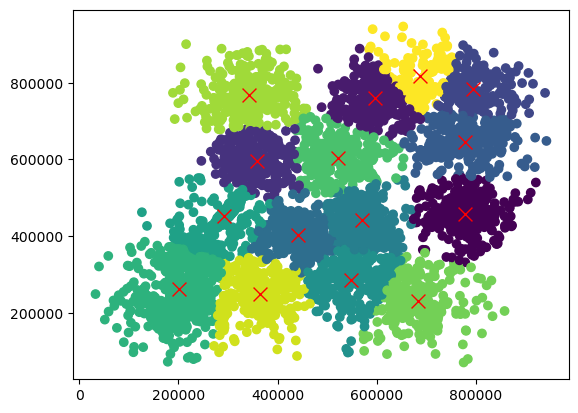

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [list(map(float, line.strip().split())) for line in lines]
    return np.array(data)

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def kmeans(data, k, max_iterations=100):
    # choose k random points as initial centroids
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[indices]
    for iteration in range(max_iterations):
        # assign data points to the closest centroids
        distances = np.array([[distance(point, centroid) for centroid in centroids] for point in data])
        cluster_indices = np.argmin(distances, axis=1)
        # update centroids as the mean of all points in the cluster
        new_centroids = np.array([data[cluster_indices == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, cluster_indices

def plot_clusters(data, centroids, cluster_indices, k):
    plt.scatter(data[:,0], data[:,1], c=cluster_indices)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100, linewidths=1, color='r')
    plt.show()

if __name__ == '__main__':
    data = load_data('s3.txt')
    k = 15
    centroids, cluster_indices = kmeans(data, k)
    plot_clusters(data, centroids, cluster_indices, k)
